# Machine learning model to predict the selling price of the used car vehicles

# Data preprocessing

Dataset link : https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho/download?datasetVersionNumber=4

In [2]:
from pyforest import*
lazy_imports()

['from sklearn.manifold import TSNE',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import skimage',
 'import sklearn',
 'import bokeh',
 'from PIL import Image',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import seaborn as sns',
 'import xgboost as xgb',
 'from xlrd import open_workbook',
 'import nltk',
 'import lightgbm as lgb',
 'from scipy import stats',
 'import torch',
 'import matplotlib as mpl',
 'from sklearn.linear_model import LogisticRegression',
 'import sys',
 'import spacy',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import tqdm',
 'from sklearn.linear_model import RidgeCV',
 'from sklearn.model_selection import StratifiedKFold',
 'import cv2',
 'from sklearn.model_selection import cross_val_score',
 'import plotly.graph_objs as go',
 'import glob',
 'import re',
 'import imutils',
 'import pandas as pd',
 'import awswrangler as wr',
 'from sklearn.preprocessing import OneHotEncoder',
 'import gensim',
 'import nump

In [5]:
df =pd.read_csv('car data.csv')
df.head()


<IPython.core.display.Javascript object>

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data exploration

In [6]:
#statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
df.shape

(301, 9)

In [11]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [13]:
#categorical columns
df.select_dtypes(include='object').columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [15]:
len(df.select_dtypes(include='object').columns)

4

In [17]:
#numerical columns
df.select_dtypes(include =['float64','int64']).columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [19]:
len(df.select_dtypes(include=['float64', 'int64']).columns)

5

# Dealing with missing values

In [21]:
df.isnull().values.any()

False

In [23]:
df.isnull().values.sum()

0

# restructure the dataset

In [25]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [28]:
df =df.drop(columns='Car_Name')

In [30]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [31]:
#add column
df['Current Year'] =2020

In [33]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [34]:
df['Years Old'] =df['Current Year'] - df['Year']

In [38]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,Years Old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [39]:
df=df.drop(columns=['Current Year', 'Year'])

In [41]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years Old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [43]:
df.select_dtypes(include='object').columns

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [45]:
len(df.select_dtypes(include='object').columns)

3

In [47]:
df['Fuel_Type'].nunique()

3

In [49]:
df['Seller_Type'].nunique()

2

In [51]:
df['Transmission'].nunique()

2

In [53]:
df.shape

(301, 8)

In [54]:
# One hot encoding
df =pd.get_dummies(data=df, drop_first=True)

<IPython.core.display.Javascript object>

In [55]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [57]:
df.shape

(301, 9)

# Correlation Matrix

In [61]:
df1 =df.drop(columns ='Selling_Price')

<AxesSubplot:title={'center':'Correlated with the selling price'}>

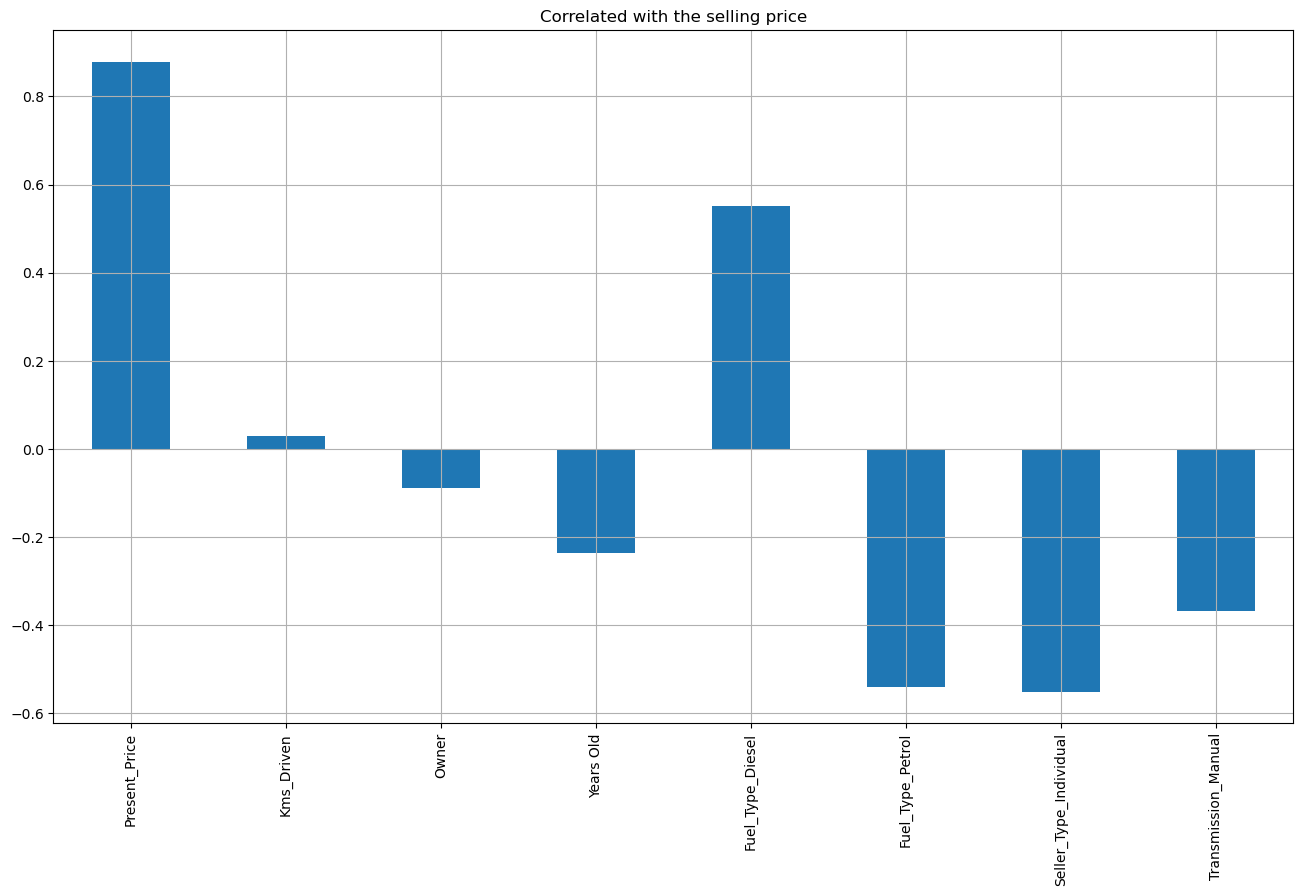

In [64]:
df1.corrwith(df['Selling_Price']).plot.bar(
    figsize=(16,9), title ="Correlated with the selling price", grid =True)

In [67]:
corr =df.corr()
corr

,Selling_Price,Present_Price,Kms_Driven,Owner,Years Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Years Old,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

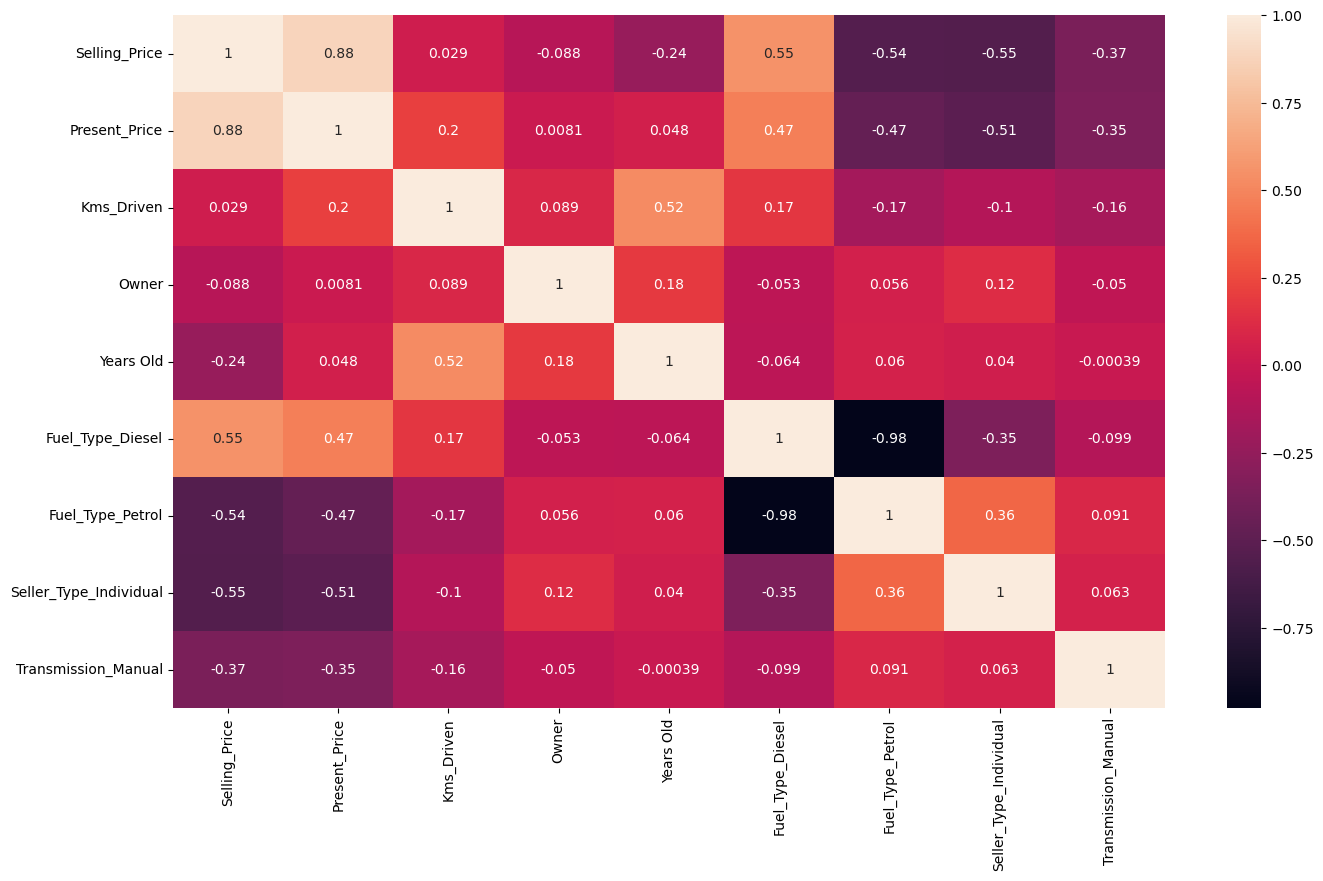

In [68]:
#heatmap
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

# Splitting the dataset 

In [70]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [72]:
#matrix of features
x =df.drop(columns='Selling_Price')


In [76]:
#target variable
y =df['Selling_Price']

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y,test_size=0.2, random_state =1)

In [80]:
x_train.shape

(240, 8)

In [81]:
x_test.shape

(61, 8)

In [82]:
y_train.shape

(240,)

In [83]:
y_test.shape

(61,)

# Feature Scaling

In [ ]:
#we are not applying feature scaling for this specific problem

# BUilding the model

# Mulitiple Linear Regression

In [85]:
from sklearn.linear_model import LinearRegression
regressor_mir =LinearRegression()
regressor_mir.fit(x_train, y_train)

LinearRegression()

In [88]:
y_pred =regressor_mir.predict(x_test)


In [90]:
from sklearn.metrics import r2_score

In [98]:
r2_score(y_test, y_pred)

0.8625260513315253

# Random Forest Regression

In [100]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf =RandomForestRegressor()
regressor_rf.fit(x_train, y_train)

RandomForestRegressor()

In [101]:
y_pred =regressor_rf.predict(x_test)

In [102]:
from sklearn.metrics import r2_score

In [103]:
r2_score(y_test, y_pred)

0.8701104204284533

In [ ]:
RandomForestRegression model performs better than LinearRegression Model